In [1]:
import numpy as np
import math
import timeit
import pandas_datareader.data as web
import certifi
import requests

In [2]:
%load_ext autoreload
%aimport dcfval, multiplesval
%autoreload 1

from dcfval import *
from multiplesval import *

# Establishing Session

In [3]:
###Define Session, namely User-Agent
rs = requests.Session()
rs.headers['User-Agent'] = 'Mozilla/5.0 (MacBook Pro; Intel Mac OS X 11.15.7) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/14.1.1 Safari/605.1.15'

# Scraping Damodaran's Website
- `DamoData`: parent class
    - Attributes
        - `base.url`: http://people.stern.nyu.edu/adamodar/New_Home_Page/datafile/
        - `industry_xls`: Address of the xls sheet containing information on the industry groupings (classification of companies into industries)
        - `hrefs`: href attributes of the hyperlinks to the individual datafiles
        - `htms`: created by getLinks() method
        - `ind_group`: created by lookupCompany() method 
    - Methods
        - `getSoup`: auxillary method to get BeautifulSoup objects
        - `getLinks`: get only links to the HTM files and saves them to .htms attribute
        - `getPngs`: get only .png links
        - `getXls`: get .xls links
        - `listNames`: list all clean names of the links (cleaned for \[dot\] and \[underscore\] extensions)
        - `lookupCompany`: first call created new attribute from the reading the excel file stored at `industry_xls` link (takes approx 30-40sec), subsequent calls can search the dataframe filtering by companies, tickers and countries
        
- `IndustryData`: inhertied class of `DamoData`, takes `var` as input (available var names stored in .htms attribute, created after getLinks is called internally)
    - Attributes
        - `var`: user inputted
        - `links`: calls getLinks() method of parent class
        - `url`: selects the correct link based on the user input
    - Methods
        - `getTable`: bottom-up approach of getting the html table into pandas dataframe (deals with reading the columns rows, columns names and indexing)
        - `rawTable`: returns raw table as a result of looping through html table's rows and columns
        - `parseTable`: returns clean dataframe using pd.read_html and cleans dataframe values of parentheses, double-spaces and tabs as well as turns values including '%' into decimals   

In [4]:
damo = DamoData()

In [5]:
damo.getCoreTables()['wacc']

,Number of Firms,Beta,Cost of Equity,E/(D+E),Std Dev in Stock,Cost of Debt,Tax Rate,After-tax Cost of Debt,D/(D+E),Cost of Capital
Industry Name,,,,,,,,,,
Advertising,61,1.08,6.01%,56.34%,57.74%,3.00%,3.35%,2.19%,43.66%,4.34%
Aerospace/Defense,72,1.07,5.96%,75.16%,34.89%,2.58%,7.37%,1.88%,24.84%,4.95%
Air Transport,17,1.61,8.52%,38.26%,46.15%,3.00%,6.00%,2.19%,61.74%,4.61%
Apparel,51,1.10,6.11%,71.74%,47.84%,3.00%,4.75%,2.19%,28.26%,5.00%
Auto & Truck,19,1.28,6.98%,72.12%,45.24%,3.00%,7.86%,2.19%,27.88%,5.65%
...,...,...,...,...,...,...,...,...,...,...
Trucking,35,1.11,6.18%,74.76%,38.78%,2.58%,9.70%,1.88%,25.24%,5.09%
Utility General,16,0.74,4.42%,57.24%,18.44%,1.92%,9.74%,1.40%,42.76%,3.13%
Utility Water,17,0.73,4.39%,71.19%,35.96%,2.58%,10.79%,1.88%,28.81%,3.67%


In [6]:
damo.listNames()[:6]

['?C=N;O=D', '?C=M;O=A', '?C=S;O=A', '?C=D;O=A', '/~adamodar/New', 'Betas']

In [7]:
damo.getLinks()[:6]

['http://people.stern.nyu.edu/adamodar/New_Home_Page/datafile/COVIDeffects.htm',
 'http://people.stern.nyu.edu/adamodar/New_Home_Page/datafile/CountryERPlist.htm',
 'http://people.stern.nyu.edu/adamodar/New_Home_Page/datafile/DollarUS.htm',
 'http://people.stern.nyu.edu/adamodar/New_Home_Page/datafile/EVA.htm',
 'http://people.stern.nyu.edu/adamodar/New_Home_Page/datafile/EVAtemp.htm',
 'http://people.stern.nyu.edu/adamodar/New_Home_Page/datafile/EVAx.htm']

In [8]:
damo.getPngs()[:3]

['http://people.stern.nyu.edu/adamodar/New_Home_Page/datafile/DbtReg1.png',
 'http://people.stern.nyu.edu/adamodar/New_Home_Page/datafile/DbtReg2.png',
 'http://people.stern.nyu.edu/adamodar/New_Home_Page/datafile/Div1for2021.png']

In [9]:
damo.getXls()[:3]

['http://people.stern.nyu.edu/adamodar/New_Home_Page/datafile/capex.xls',
 'http://people.stern.nyu.edu/adamodar/New_Home_Page/datafile/dbtratio.xls',
 'http://people.stern.nyu.edu/adamodar/New_Home_Page/datafile/divratio.xls']

In [10]:
damo.lookupCompany(name = "Apple", ticker = "AAPL")

,Company Name,Exchange:Ticker,Industry Group,Country,Broad Group,Sub Group
2648,Apple Inc. (NasdaqGS:AAPL),NasdaqGS:AAPL,Computers/Peripherals,United States,United States,United States


In [11]:
#new attribute from lookupCompany method stored in .ind_group
damo.ind_group.head(5)

,Company Name,Exchange:Ticker,Industry Group,Country,Broad Group,Sub Group
0,"""Bank ""Saint-Petersburg"" Public Joint-Stock Co...",MISX:BSPB,Bank (Money Center),Russia,Emerging Markets,Eastern Europe & Russia
1,@Health SA (ENXTPA:MLAHC),ENXTPA:MLAHC,Healthcare Products,France,Developed Europe,EU & Environs
2,01 Communique Laboratory Inc. (TSXV:ONE),TSXV:ONE,Software (System & Application),Canada,"Australia, NZ and Canada",Canada
3,01Cyberaton Proenergy Spolka Akcyjna (WSE:01C),WSE:01C,Green & Renewable Energy,Poland,Developed Europe,EU & Environs
4,1 Production Film Co. (GTSM:8458),GTSM:8458,Entertainment,Taiwan,Emerging Markets,Small Asia


In [12]:
#after new attribute is created the search just goes thru the ind_group dataframe
damo.lookupCompany(name = "Facebook", ticker = "FB")

,Company Name,Exchange:Ticker,Industry Group,Country,Broad Group,Sub Group
13485,"Facebook, Inc. (NasdaqGS:FB)",NasdaqGS:FB,Software (Entertainment),United States,United States,United States


In [13]:
damo.getCountryRP().head(5)

,Region,Moody rating,Default Spread,ERP,Country RP
Country,,,,,
Abu Dhabi,Middle East,Aa2,0.0044,0.052,0.0048
Albania,Eastern Europe & Russia,B1,0.0398,0.0908,0.0436
Andorra Principality of,Western Europe,Caa1,0.0663,0.1198,0.0726
Angola,Africa,Caa1,0.0663,0.1198,0.0726
Argentina,Central and South America,Ca,0.106,0.1634,0.1162


In [14]:
damo.getDefaultSpread().head(5)

LargeCap (>$5bn)                      
              ICR>     Rating     Spread
0                >  Rating is  Spread is
1             8.50    Aaa/AAA      0.63%
2              6.5     Aa2/AA      0.78%
3              5.5      A1/A+      0.98%
4             4.25       A2/A      1.08%

In [15]:
damo.getERP().head(5)

Annual Returns on Investments in                            \
Year     S&P 500 (includes dividends) 3-month T.Bill US T. Bond   
1928                           0.4381         0.0308     0.0084   
1929                          -0.0830         0.0316     0.0420   
1930                          -0.2512         0.0455     0.0454   
1931                          -0.4384         0.0231    -0.0256   
1932                          -0.0864         0.0107     0.0879   

                        Value of $100 invested at start of 1928 in  \
Year Baa Corporate Bond              S&P 500 (includes dividends)3   
1928             0.0322                                   $ 143.81   
1929             0.0302                                   $ 131.88   
1930             0.0054                                    $ 98.75   
1931            -0.1568                                    $ 55.46   
1932             0.2359                                    $ 50.66   

                                                     Annual Risk Premium  \
Year 3-month T.Bill4 US T. Bond5 Baa Corporate Bond6      Stocks - Bills   
1928        $ 103.08    $ 100.84            $ 103.22              0.4073   
1929        $ 106.34    $ 105.07            $ 106.33             -0.1146   
1930        $ 111.18    $ 109.85            $ 106.91             -0.2967   
1931        $ 113.74    $ 107.03             $ 90.14             -0.4615   
1932        $ 114.96    $ 116.44            $ 111.41             -0.0971   

                                                                    \
Year Stocks - Bonds Stocks - Baa Corp Bond Historical risk premium   
1928         0.4298                 0.4059                     NaN   
1929        -0.1250                -0.1132                     NaN   
1930        -0.2966                -0.2566                     NaN   
1931        -0.4128                -0.2816                     NaN   
1932        -0.1743                -0.3223                     NaN   

     Unnamed: 13_level_0        Annual Real Returns on                         \
Year      Inflation Rate S&P 500 (includes dividends)2 3-month T. Bill (Real)   
1928             -0.0115                        0.4549                 0.0428   
1929              0.0000                       -0.0830                 0.0316   
1930             -0.0267                       -0.2307                 0.0742   
1931             -0.0893                       -0.3833                 0.1234   
1932             -0.1030                        0.0185                 0.1268   

                                     
Year !0-year T.Bonds Baa Corp Bonds  
1928          0.0201         0.0442  
1929          0.0420         0.0302  
1930          0.0741         0.0330  
1931          0.0700        -0.0741  
1932          0.2128         0.3778

In [16]:
#Children class of DamoData(), takes the var argument specifying the variable of interest, all relevant variables can be found via .listNames()
#IndustryData ONLY parses through .htm links --> available variables stored in .htms attribute
ind_data = IndustryData('wacc')
industry_wacc = ind_data.parseTable()

In [17]:
ind_data.htms[:4]

['COVIDeffects.htm', 'CountryERPlist.htm', 'DollarUS.htm', 'EVA.htm']

In [18]:
industry_wacc.index #industries

Index(['Advertising', 'Aerospace/Defense', 'Air Transport', 'Apparel',
       'Auto & Truck', 'Auto Parts', 'Bank Money Center', 'Banks Regional',
       'Beverage Alcoholic', 'Beverage Soft', 'Broadcasting',
       'Brokerage & Investment Banking', 'Building Materials',
       'Business & Consumer Services', 'Cable TV', 'Chemical Basic',
       'Chemical Diversified', 'Chemical Specialty', 'Coal & Related Energy',
       'Computer Services', 'Computers/Peripherals', 'Construction Supplies',
       'Diversified', 'Drugs Biotechnology', 'Drugs Pharmaceutical',
       'Education', 'Electrical Equipment', 'Electronics Consumer & Office',
       'Electronics General', 'Engineering/Construction', 'Entertainment',
       'Environmental & Waste Services', 'Farming/Agriculture',
       'Financial Svcs. Non-bank & Insurance', 'Food Processing',
       'Food Wholesalers', 'Furn/Home Furnishings', 'Green & Renewable Energy',
       'Healthcare Products', 'Healthcare Support Services',
       'Hea

In [19]:
industry_wacc #sum table 

,Number of Firms,Beta,Cost of Equity,E/(D+E),Std Dev in Stock,Cost of Debt,Tax Rate,After-tax Cost of Debt,D/(D+E),Cost of Capital
Industry Name,,,,,,,,,,
Advertising,61,1.08,0.0601,0.5634,0.5774,0.0300,0.0335,0.0219,0.4366,0.0434
Aerospace/Defense,72,1.07,0.0596,0.7516,0.3489,0.0258,0.0737,0.0188,0.2484,0.0495
Air Transport,17,1.61,0.0852,0.3826,0.4615,0.0300,0.0600,0.0219,0.6174,0.0461
Apparel,51,1.10,0.0611,0.7174,0.4784,0.0300,0.0475,0.0219,0.2826,0.0500
Auto & Truck,19,1.28,0.0698,0.7212,0.4524,0.0300,0.0786,0.0219,0.2788,0.0565
...,...,...,...,...,...,...,...,...,...,...
Trucking,35,1.11,0.0618,0.7476,0.3878,0.0258,0.0970,0.0188,0.2524,0.0509
Utility General,16,0.74,0.0442,0.5724,0.1844,0.0192,0.0974,0.0140,0.4276,0.0313
Utility Water,17,0.73,0.0439,0.7119,0.3596,0.0258,0.1079,0.0188,0.2881,0.0367


In [20]:
industry_wacc.loc['Semiconductor']

Number of Firms           70.0000
Beta                       1.0000
Cost of Equity             0.0566
E/(D+E)                    0.9115
Std Dev in Stock           0.3726
Cost of Debt               0.0258
Tax Rate                   0.0641
After-tax Cost of Debt     0.0188
D/(D+E)                    0.0885
Cost of Capital            0.0533
Name: Semiconductor, dtype: float64

In [21]:
#alternative methods to get the dataframe
# getTable uses bottom.up approach to get the table instead of pd.read_html()
# rawTable gets rawTable by only looping through rows and columns of the html table --> need to set columns, indices and clean table
ind_data.getTable()

,Number of Firms,Beta,Cost of Equity,E/(D+E),Std Dev in Stock,Cost of Debt,Tax Rate,After-tax Cost of Debt,D/(D+E),Cost of Capital
Industry Name,,,,,,,,,,
Advertising,61,1.08,6.01%,56.34%,57.74%,3.00%,3.35%,2.19%,43.66%,4.34%
Aerospace/Defense,72,1.07,5.96%,75.16%,34.89%,2.58%,7.37%,1.88%,24.84%,4.95%
Air Transport,17,1.61,8.52%,38.26%,46.15%,3.00%,6.00%,2.19%,61.74%,4.61%
Apparel,51,1.10,6.11%,71.74%,47.84%,3.00%,4.75%,2.19%,28.26%,5.00%
Auto & Truck,19,1.28,6.98%,72.12%,45.24%,3.00%,7.86%,2.19%,27.88%,5.65%
...,...,...,...,...,...,...,...,...,...,...
Utility (General),16,0.74,4.42%,57.24%,18.44%,1.92%,9.74%,1.40%,42.76%,3.13%
Utility (Water),17,0.73,4.39%,71.19%,35.96%,2.58%,10.79%,1.88%,28.81%,3.67%
Total Market,7582,0.94,5.37%,67.42%,41.21%,3.00%,5.76%,2.19%,32.58%,4.34%


In [22]:
ind_data.rawTable()

,0,1,2,3,4,5,6,7,8,9,10
0,Industry\r\n Name,Number of Firms,Beta,Cost of Equity,E/(D+E),Std Dev in Stock,Cost of Debt,Tax Rate,After-tax Cost of Debt,D/(D+E),Cost of Capital
1,Advertising,61,1.08,6.01%,56.34%,57.74%,3.00%,3.35%,2.19%,43.66%,4.34%
2,Aerospace/Defense,72,1.07,5.96%,75.16%,34.89%,2.58%,7.37%,1.88%,24.84%,4.95%
3,Air\r\n Transport,17,1.61,8.52%,38.26%,46.15%,3.00%,6.00%,2.19%,61.74%,4.61%
4,Apparel,51,1.10,6.11%,71.74%,47.84%,3.00%,4.75%,2.19%,28.26%,5.00%
...,...,...,...,...,...,...,...,...,...,...,...
93,Utility\r\n (General),16,0.74,4.42%,57.24%,18.44%,1.92%,9.74%,1.40%,42.76%,3.13%
94,Utility (Water),17,0.73,4.39%,71.19%,35.96%,2.58%,10.79%,1.88%,28.81%,3.67%
95,Total\r\n Market,7582,0.94,5.37%,67.42%,41.21%,3.00%,5.76%,2.19%,32.58%,4.34%
96,Total Market (without financials),6253,0.98,5.55%,79.93%,44.77%,3.00%,4.39%,2.19%,20.07%,4.87%


----
----
----
# Multiples Valuation

In [23]:
amd = Multiples("AMD", sesh = rs)

## Damodaran Industry Classification

In [24]:
amd.damo.lookupCompany(ticker = 'AMD')

,Company Name,Exchange:Ticker,Industry Group,Country,Broad Group,Sub Group
789,"Advanced Micro Devices, Inc. (NasdaqGS:AMD)",NasdaqGS:AMD,Semiconductor,United States,United States,United States
1723,Almeda Ventures Limited Partnership (TASE:AMDA.L),TASE:AMDA.L,Investments & Asset Management,Israel,Emerging Markets,Africa and Middle East
3039,Arrow Minerals Limited (ASX:AMD),ASX:AMD,Metals & Mining,Australia,"Australia, NZ and Canada",Australia & NZ
14141,FLC Stone Mining and Investment Joint Stock Co...,HOSE:AMD,Diversified,Vietnam,Emerging Markets,Small Asia


In [25]:
#Initialised attributes
amd.__dict__.keys()

dict_keys(['sesh', 'ticker', 'yfticker', 'sector', 'damo', 'fin', 'bal', 'fin_analysis', 'mktcap', 'nd', 'beta', '_ke', '_default_spread', 'country_defaultspread', '_kd', '_wacc', 'forecast', 'horizon_wacc', 'hv', 'estimate', 'multiples', 'current_mult', 'peer_mult_current', 'mult_est', 'industry_multiples'])

## Multiples

In [26]:
#Lets get BOOK and CURRENT multiples
amd.get_Multiples()

,AMD
P/BV,1.495052e+01
P/S,7.917948e+00
P/E,3.074081e+01
EV/Sales,7.848683e+00
EV/EBIT,4.126978e+01
EV,1.047014e+11
MktCap,1.056254e+11


In [27]:
amd.get_Multiples(current = True)

,AMD
P/BV,17.968750
P/S,9.515540
EV/Sales,9.280000
EV/EBITDA,42.675000
PEG,1.470000
P/E,36.943338


## Peer multiples

In [28]:
%%capture output
peers = ['SPWR','SITM','XLNX','MRVL','NVDA','INTC','SWKS']
amd.peer_multiples(peers)

In [29]:
amd.peer_mult[:5].style.background_gradient(cmap = 'OrRd', axis = 1)
HighlightDf(amd.peer_mult[:5])

,SPWR,SITM,XLNX,MRVL,NVDA,INTC,SWKS,AMD
P/BV,10.974415,7.939125,11.436535,2.441784,23.350347,2.719152,6.296286,14.950521
P/S,3.955370,15.772796,10.812885,11.672780,22.550568,2.985129,6.624408,7.917948
P/E,10.069335,nan,47.005134,nan,69.754172,12.486702,22.198070,30.740812
EV/Sales,3.808991,15.772796,10.670528,13.237736,22.448727,3.313390,6.909161,7.848683
EV/EBIT,168.043718,2675.062752,44.680621,778.397810,67.281657,11.296673,21.150493,41.269779


In [30]:
amd.peer_multiples(peers, current = True)

,SPWR,SITM,XLNX,MRVL,NVDA,INTC,SWKS,AMD
P/BV,8.166927,12.943243,11.372379,3.289185,24.570349,2.476431,5.903241,17.968750
P/S,2.938115,25.714430,10.820386,15.783259,23.689762,2.718605,6.212647,9.515540
EV/Sales,3.012000,24.108000,10.261000,17.253000,23.452000,2.855000,5.935000,9.280000
EV/EBITDA,90.820000,516.603000,34.624000,73.571000,60.509000,6.394000,15.039000,42.675000
PEG,-1.860000,4.070000,4.580000,1.230000,1.670000,1.120000,1.060000,1.470000
P/E,6.596089,-18044.807046,47.037680,-194.240458,73.288320,11.371843,20.819746,36.943338


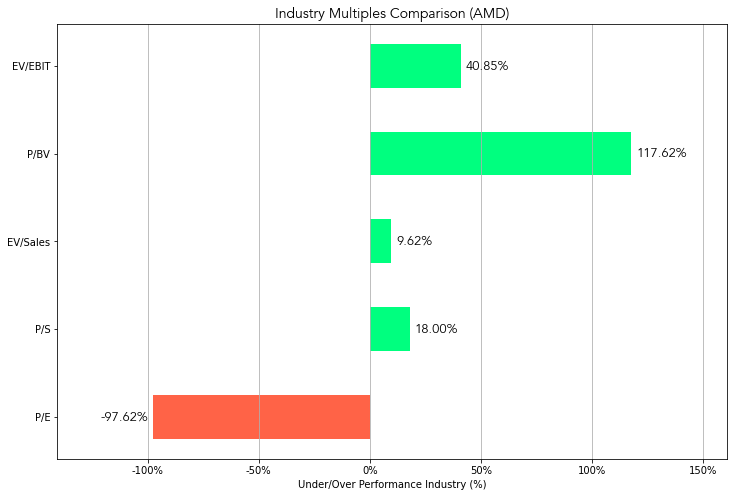

In [31]:
amd.IndustryPerformance('Semiconductor')

## Estimate of MarketCap and Enterprise Value
- Using the ranges from the user defined peers the min-max ranges of estimated value of equity and enterprise value are constructed

In [32]:
amd.estimate_multiples()

,Min,Avg,Max
P/BV,1.725121e+10,7.074552e+10,1.649702e+11
P/S,3.982161e+10,1.372217e+11,3.008246e+11
P/E,3.459823e+10,1.100976e+11,2.396753e+11
EV/Sales,4.420062e+10,1.400867e+11,2.994660e+11
EV/EBIT,2.865966e+10,1.207353e+12,6.786634e+12


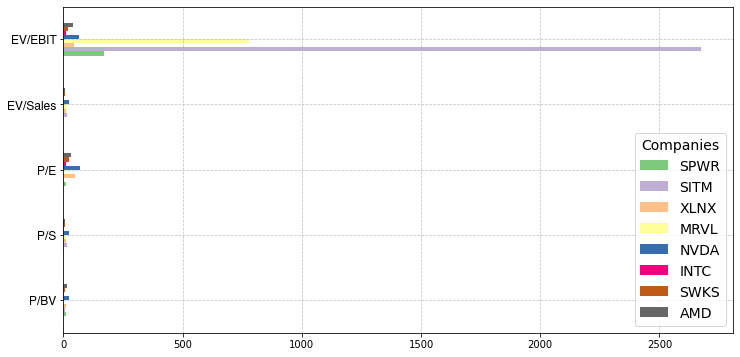

In [33]:
amd.plot_Multiples(thickness = .08)

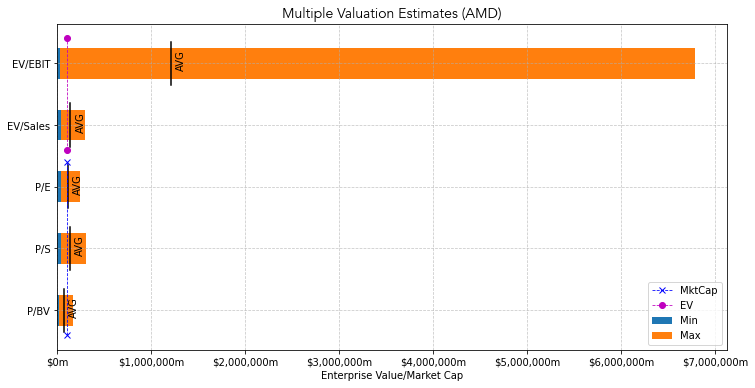

In [34]:
amd.visual_mult()

# Discounted Cash Flow Valuation
## Apple (AAPL)

Let us value the the largest company in the world for demonstration, that is Apple current valued at about $2.4 trillion.
Note that valuation requires plenty of explicit assumptions and forecasting, which however, will not be discussed in detail here. The main purpose of the demonstration is to showcase the functional side of the module.

First initialising the Valuation class numerous new attributes are created/initiliased.
- sesh: requests.Sesison object explicitly given
- ticker: explicitly stated
- yfticker: yf.Ticker object
- sector
- damo: initialised DamoData class
- fin: financials
- bal: balance sheet
- fin_analysis: key metrics
- mktcap: Market Capitalisation on the date of the last reported financial quarter
- nd: net debt from balance sheet
- beta: CAPM 5-year monthly data beta

In [35]:
aapl = Valuation('AAPL', rs)
aapl.__dict__.keys()

dict_keys(['sesh', 'ticker', 'yfticker', 'sector', 'damo', 'fin', 'bal', 'fin_analysis', 'mktcap', 'nd', 'beta', '_ke', '_default_spread', 'country_defaultspread', '_kd', '_wacc', 'forecast', 'horizon_wacc', 'hv', 'estimate'])

Instead of using the CAPM beta let us use an alternative way of computing beta, the bottom-up beta approach. By taking industry's unlevered beta, net of the effect of financial leverage, and relever it using company's own leverage and tax rate. Compared to CAPM such approach considers current debt ratios. Moreover, it defines betas not only with respect to market sensitivity but also within dimensions of financial and operational risk unique to the industry.

In [36]:
###Lookup Damodaran's industry classification
aapl.damo.lookupCompany(ticker = 'AAPL')

,Company Name,Exchange:Ticker,Industry Group,Country,Broad Group,Sub Group
2648,Apple Inc. (NasdaqGS:AAPL),NasdaqGS:AAPL,Computers/Peripherals,United States,United States,United States


In [37]:
##By default tax rate and d/e ratio are taken from the last reported quarter.
#We explicitly set the tax rate to 15%
#Compared to the CAPM beta (1.24) the beta heavily decreased to only 1.1, presumably mainly due to the negative d/e ratio, i.e. large amount of cash that Apple carry
aapl.nd/aapl.mktcap
aapl.fin.loc['Effective Tax Rate']
aapl.BottomUpBeta('Computers/Peripherals', tax = .15)

1.0905740408417737

## Cost of Debt

We will demonstrate all three approaches available to compute cost of debt, i.e. _book, bond,_ and _synthetic_. All three calculations will require the input of risk-free rate, for which we will use 10Y Treasury Bond yield smoothed over the last month.

- Book
    - This simply takes the most recent effective tax rate from the reconstructed financials and uses it as the cost of debt

In [38]:
###Risk free rate
rf = yf.Ticker('^TNX').history(period = '1mo')['Close'].mean()
aapl.CostofDebt(rf = rf, method = 'book')
aapl.kd

0.02291042349570704

- Bond Yield
    - Apple has Aa1 rating according to Moody's corresponding to very low credit risk
    - Let us find the effective yield on Aa1 (AA+) rated corporate bonds using pandas web data reader on FRED data
    - The effective yield on AA rated corporate bonds is then simply representative of Apple's cost of debt
    - The default spread is simply the spread between risk-free rate and effective yield.

In [39]:
bofa_bond_yields = {'AAA' : 'BAMLC0A1CAAAEY', 'AA' : 'BAMLC0A2CAAEY', 'A' : 'BAMLC0A3CAEY',
                    'BBB' : 'BAMLC0A4CBBBEY', 'BB' : 'BAMLH0A1HYBBEY', 'B' : 'BAMLH0A2HYBEY',
                    '<BBB' : 'BAMLH0A0HYM2EY', '<BBB.EUR' : 'BAMLHE00EHYIEY'}
aapl_bond_yield = web.get_data_fred(bofa_bond_yields['AA'], start = dt.date.today() - dt.timedelta(days=30)).mean()
aapl.CostofDebt(rf = rf, bond_yield = aapl_bond_yield[0], method = 'bond')
aapl.kd

0.01697

- Synthetic Rating
    - Country Default Spread: From SEC financials statement look up Segment Information and Geographic data from which the country default spreads can be inferred.
        - The overstatement of default spread in Asia is adjusted by taking __1%__ off the country default spread
        - Such adjustment is applicable considering the Apple's strong position in more developed market in the Asian areas.
    - Default Spread
        - Considering the huge Interest Coverage Ratio (38.33) and Apple's net debt and overall stability the synthetic rating is at AAA with default spread of __0.5\%__.

In [40]:
all_rev = 282.457
america_rev = 116.486
europe = 68.513
asia = 53.803 + 22.491 + 21.164 
weights = [i/all_rev for i in [america_rev, europe, asia]]
aapl.DefaultSpread(spread = .005)
aapl.CountryDefaultPremium(regions=['North America', 'Europe', 'Asia'], weights = weights)
aapl.country_defaultspread = aapl.country_defaultspread - .01
aapl.CostofDebt(rf = rf, method = 'synthetic')
aapl.kd

0.02231736227157373

## Cost of Equity
- Note that above we specified bottom-up beta which is the beta used to calculate the cost of equity
- Default option for the risk free rate is used (last month average of 10Y Treasury Bond)
- both Historical Implied Risk Premium and Historical ERP are demonstrated

In [41]:
##Computes as rf/100 + beta*erp
#rf is 10Y Treasury Bond (30day trailing average)
#erp is historical equity risk premium from Damodaran's dataset
aapl.CostofEquity(rf = None, rp = 'hist')

0.06542469269582768

In [42]:
##Same as above
#ERP now implied equity risk premium (free cash flow to equity) from Damodaran's dataset
aapl.CostofEquity(rp = 'impl')

0.06411600384681755

# Weighted Average Cost of Capital
- Using the above specified rates we only need to specify estimated tax rate to compute WACC

In [43]:
## Let's check historical effective tax rates
aapl.fin.loc['Effective Tax Rate']

2021-06-26    0.139381
2020-09-26    0.144282
2019-09-28    0.159438
2018-09-29    0.183422
2017-09-30    0.245565
Name: Effective Tax Rate, dtype: float64

In [44]:
## We estimate the tax rate at about 15%
aapl.WACC(tax = .15)
'The Weighted Average Cost of Capital is estimated at {:.5%}'.format(aapl.wacc)

'The Weighted Average Cost of Capital is estimated at 6.50651%'

# Explicit Forecast

In [45]:
aapl.bal

,2021-06-26,2020-09-26,2019-09-28,2018-09-29,2017-09-30
Total Assets,3.298400e+11,3.238880e+11,3.385160e+11,3.657250e+11,3.753190e+11
Total Liabilities,2.655600e+11,2.585490e+11,2.480280e+11,2.585780e+11,2.412720e+11
Total Equity,6.428000e+10,6.533900e+10,9.048800e+10,1.071470e+11,1.340470e+11
Current Operating Assets,8.677700e+10,9.078600e+10,1.111060e+11,9.095100e+10,7.475300e+10
Current Operating Liabilities,9.971500e+10,9.661900e+10,9.545800e+10,1.071450e+11,9.431800e+10
Working Capital,6.669000e+09,3.832100e+10,5.710100e+10,1.541000e+10,2.783100e+10
Operating Working Capital,-1.293800e+10,-5.833000e+09,1.564800e+10,-1.619400e+10,-1.956500e+10
LT Operating Assets,8.346900e+10,7.928800e+10,7.035600e+10,6.358700e+10,5.196000e+10
LT Operating Liabilities,5.205400e+10,5.449000e+10,5.050300e+10,4.891400e+10,4.325100e+10
NTA,3.141500e+10,2.479800e+10,1.985300e+10,1.467300e+10,8.709000e+09


- Growth in Net Sales
    - Following the double-digit sales growth in the current year, next year's sales are expected to fall
    - The growth in net sales is forecasted corresponding the iPhone supercycle pattern present in company's sales and with the rising importance of services division
    - The 5G catalyst is expected to drive sales in the upcoming years
    - Given the forecasted higher reliance on services revenue is expected to be more stable in latter part of the forecast
    - The last period 3% growth rate is with respect to Apple's growing R&D intensity and future possible catalysts in car-tech and AI
- Profit Margin (operating)
    - With growth in services and move to more profitable segments profit margins are estimated to grow, reaching up to 35% margin in 2026.
    - Moreover, more inhouse production and better supply chain management can also lead to significant cost savings.
- Net Long Term Asset Turnover
    - Apple's generetaing sales/cash ability is forecasted to be relatively sustained with very slow decay into the later years
    - By the end of the 5-year horizon the effectivity is expected to slighly decline to 8 due to larger asset base expected in pursuit of more capital intensive catalysts.
- Operating Working Capital Turnover
    - The large operating working capital built up in the current year is forecasted to quickly shrink in the upcoming years and turn negative into the later years of the forecast horizon
- Tax Rate
    - Expected to sustain in the next two years and increase by 2% by the end of the forecast period.

In [46]:
var_forecast = {'gns' : [-.05, .03, .10, .04, .05, .03], 
                'pm' : [.26, .28, .30, .33, .35],
                'xat': [13.5, 13, 12, 10.5, 9],
                'wct' : [100, 80, 40, 20, -30],
                'tax': [.14, .14, .15, .15, .16]}
aapl.Forecast(**var_forecast)
tab = aapl.getForecastTable()
##Prettify the table to display figures in $ millions
tab.iloc[:8] = tab.iloc[:8].applymap(lambda x: '{:,.2f}'.format(x/10**6))
tab

Historical                                                  \
                        2017        2018        2019        2020        2021   
Net Sales         229,234.00  265,595.00  260,174.00  274,515.00  347,155.00   
EBIT               61,344.00   70,898.00   63,930.00   66,288.00   99,938.00   
NOPLAT             46,280.08   57,893.76   53,737.11   56,723.86   86,008.51   
Net Fixed Assets    8,709.00   14,673.00   19,853.00   24,798.00   31,415.00   
Working Capital   -19,565.00  -16,194.00   15,648.00   -5,833.00  -12,938.00   
Invested Capital  -10,856.00   -1,521.00   35,501.00   18,965.00   18,477.00   
Change in IC             nan    9,335.00   37,022.00  -16,536.00     -488.00   
Free Cash Flow           nan   48,558.76   16,715.11   73,259.86   86,496.51   
ROIC                     NaN    -5.33288    -35.3301     1.59781     4.53512   

                  Forecasted                                                  \
                        2022        2023        2024        2025        2026   
Net Sales         329,797.25  339,691.17  373,660.28  388,606.70  408,037.03   
EBIT               85,747.29   95,113.53  112,098.09  128,240.21  142,812.96   
NOPLAT             73,742.67   81,797.63   95,283.37  109,004.18  119,962.89   
Net Fixed Assets   25,162.31   28,743.10   32,383.89   38,860.67   46,697.57   
Working Capital     3,396.91    4,670.75    9,715.17   20,401.85  -14,009.27   
Invested Capital   28,559.22   33,413.85   42,099.06   59,262.52   32,688.30   
Change in IC       10,082.22    4,854.63    8,685.21   17,163.46  -26,574.22   
Free Cash Flow     63,660.44   76,943.00   86,598.17   91,840.72  146,537.11   
ROIC                  2.5821     2.44802     2.26331     1.83934      3.6699   

                              
                        2027  
Net Sales         420,278.14  
EBIT                     nan  
NOPLAT                   nan  
Net Fixed Assets         nan  
Working Capital          nan  
Invested Capital         nan  
Change in IC             nan  
Free Cash Flow           nan  
ROIC                     NaN

# Horizon Value
Continuing value of the company is computed using horizon revenue growth, roic and return on new invested capital (ronic). Moreover, different WACC can be specified for the continuing value, typically normalised WACC using historical averages of the risk free rate for example.

- __Growth in net sales__ (last from the explicit forecast) estimated at __3%__
    - 1% below the 20Y US Nominal GDP Growth average
    - Relatively optimistic horizon growth based on future catalysts and growing R\&D intensity with potential to bring new catalysts.
    - With the brand salience and economies of scale Apple is posed to sustain relatively large position on the market
- __Return on Invested Capital__
    - Revised down to 200% compared to the trend in the forecast table (based on OUR IMPUTED Invested Capital!!!)
    - Extenstive history of company's ability to generate cash
- __Return on New Invested Capital__
    - With potential catalysts requiring more investment and larger asset base the return on new invested capital is expected to be largely reduced
- __Weighted Average Cost of Capital__
    - Expected to stay the same 
    - _Acknowledgement: The current historically low interest rate may not be sustianable in the long term, hence revision of future interest rates up may be exepcted._

In [47]:
aapl.HorizonValue(gns = 0.03, roic = 2, ronic = .80)
pv_fcf = aapl.getPV(out = "eqval") - aapl.hv/(1+aapl.wacc)**(aapl.forecast.shape[1]-1)
aapl.getPV(out = 'pps')

104.82395628229341

# Sensitivity Table
Following sensitivty table uses either user specified ranges for ROIC and WACC or default constructed ranges to plot the estimated equity value (in $ millions) for the respective variables.

Default ranges are constructed as follows
- ROIC: (-10\%, +20\%) range with 2\% spread
- WACC: (-3\%, +3\%) range with 0.05\% spread

In [48]:
aapl.SensitivityAnalysis(gns = .03, ronic = .80, roic = 2, cmap = 'spring')

ROIC,190.00%,192.00%,194.00%,196.00%,198.00%,200.00%,202.00%,204.00%,206.00%,208.00%,210.00%,212.00%,214.00%,216.00%,218.00%,220.00%
WACC,,,,,,,,,,,,,,,,
3.51%,"10,394,541","10,499,109","10,603,677","10,708,245","10,812,813","10,917,381","11,021,949","11,126,517","11,231,086","11,335,654","11,440,222","11,544,790","11,649,358","11,753,926","11,858,494","11,963,062"
4.01%,"5,334,086","5,385,455","5,436,825","5,488,194","5,539,563","5,590,932","5,642,302","5,693,671","5,745,040","5,796,410","5,847,779","5,899,148","5,950,518","6,001,887","6,053,256","6,104,625"
4.51%,"3,630,750","3,664,257","3,697,764","3,731,271","3,764,777","3,798,284","3,831,791","3,865,298","3,898,805","3,932,312","3,965,819","3,999,326","4,032,833","4,066,340","4,099,847","4,133,354"
5.01%,"2,774,913","2,799,477","2,824,041","2,848,605","2,873,169","2,897,733","2,922,297","2,946,862","2,971,426","2,995,990","3,020,554","3,045,118","3,069,682","3,094,246","3,118,810","3,143,375"
5.51%,"2,259,438","2,278,640","2,297,843","2,317,045","2,336,248","2,355,450","2,374,653","2,393,855","2,413,058","2,432,260","2,451,463","2,470,665","2,489,868","2,509,070","2,528,273","2,547,475"
6.01%,"1,914,545","1,930,180","1,945,815","1,961,450","1,977,085","1,992,720","2,008,355","2,023,990","2,039,625","2,055,260","2,070,895","2,086,530","2,102,165","2,117,800","2,133,435","2,149,070"
6.51%,"1,667,292","1,680,385","1,693,479","1,706,573","1,719,667","1,732,761","1,745,855","1,758,949","1,772,042","1,785,136","1,798,230","1,811,324","1,824,418","1,837,512","1,850,606","1,863,699"
7.01%,"1,481,145","1,492,340","1,503,534","1,514,729","1,525,923","1,537,118","1,548,312","1,559,507","1,570,701","1,581,896","1,593,090","1,604,285","1,615,480","1,626,674","1,637,869","1,649,063"
7.51%,"1,335,786","1,345,509","1,355,232","1,364,955","1,374,678","1,384,402","1,394,125","1,403,848","1,413,571","1,423,294","1,433,018","1,442,741","1,452,464","1,462,187","1,471,910","1,481,634"


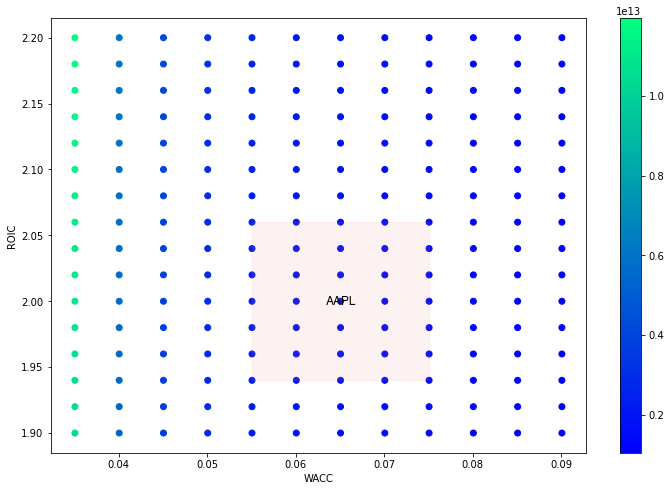

In [49]:
aapl.SensitivityAnalysis(gns = 0.03, ronic = 0.80,roic = 2, plot = True, cmap = 'winter')

In [50]:
##All attributes
aapl.sesh
aapl.ticker
aapl.yfticker
aapl.sector
aapl.damo
aapl.fin
aapl.bal
aapl.fin_analysis
aapl.mktcap
aapl.nd
aapl.beta
aapl.ke
aapl.default_spread
aapl.country_defaultspread
aapl.kd
aapl.wacc
aapl.forecast
aapl.horizon_wacc
aapl.hv
aapl.ndweight
aapl.estimate

1732760915176.434

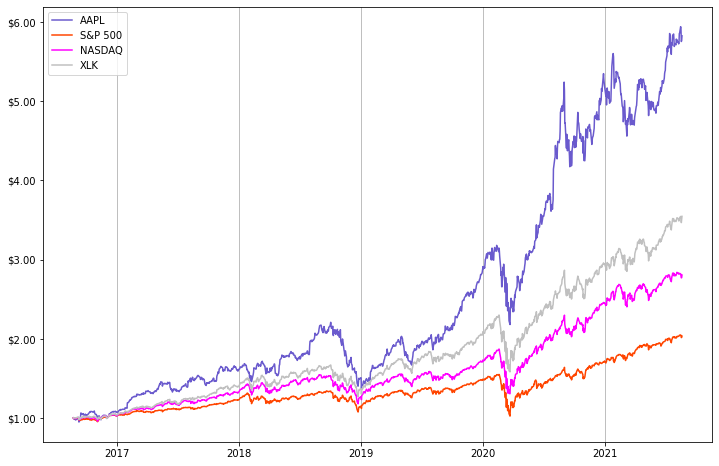

In [51]:
#aapl.yfticker.history(period = '5y')['Close'].plot(figsize = (12,8), color = 'slateblue')

fig, ax = plt.subplots(figsize = (12, 8))

aapl_ret = (1+aapl.yfticker.history(period = '5y')['Close'].pct_change()).cumprod()
sp_ret = (1 + yf.Ticker('^GSPC').history(period = '5y')['Close'].pct_change()).cumprod()
nasdaq_ret = (1 + yf.Ticker('^IXIC').history(period = '5y')['Close'].pct_change()).cumprod()
xlk_ret = (1 + yf.Ticker('XLK').history(period = '5y')['Close'].pct_change()).cumprod()

ax.plot(aapl_ret, color = 'slateblue', label = 'AAPL')
ax.plot(sp_ret, color = 'orangered', label = 'S&P 500')
ax.plot(nasdaq_ret, color = 'magenta', label  = 'NASDAQ')
ax.plot(xlk_ret, color = 'silver', label = 'XLK')
ax.yaxis.set_major_formatter(lambda x,p: '${:.2f}'.format(x))

ax.grid(axis = 'x')
ax.legend()

plt.show()

[*********************100%***********************]  3 of 3 completed


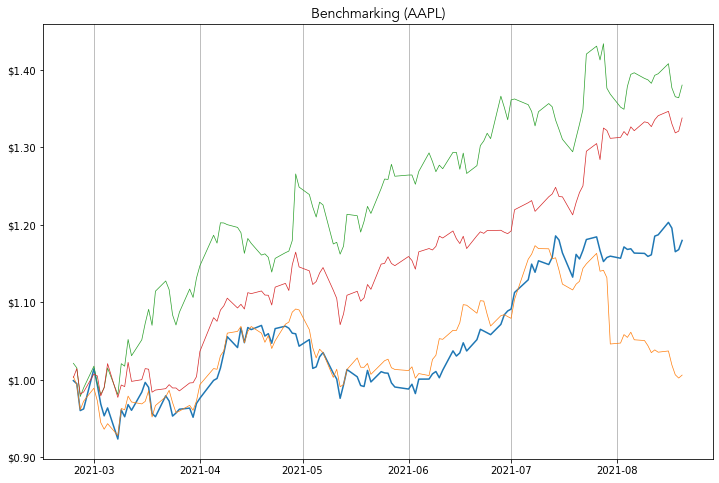

In [52]:
aapl.Benchmark(period = '6mo', tickers = ['AMZN', 'FB', 'GOOGL'])

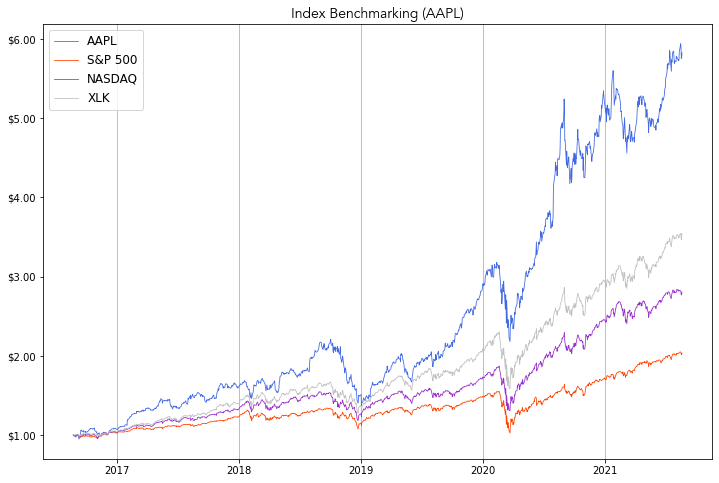

In [53]:
aapl.Benchmark(period = '5y')